In [33]:
import sys
sys.path.append("../") # go to parent dir

import argparse

import pandas as pd
import numpy as np
import seaborn as sns; sns.set(rc={'figure.figsize':(10,10)})
import matplotlib.pyplot as plt

from codebase.topic_utilities import calculate_jaccard_matrix_between_models, pick_similar_topic_from_past

# Function (1): Create Similarity Heatmap for Topics Between Adjacent Two Weeks

In [15]:
m1_path = "./models/SecondWeek-March-Tweets-Rolling-25topics-summary.csv"
m2_path = "./models/W2-March-Tweets-25topics-summary.csv"

In [16]:
m1 = pd.read_csv(f"{m1_path}")
m2 = pd.read_csv(f"{m2_path}")
m1_ws = m1.relevant_words.to_dict()
m2_ws = m2.relevant_words.to_dict()

jaccardMatrix = calculate_jaccard_matrix_between_models(m1_ws, m2_ws)

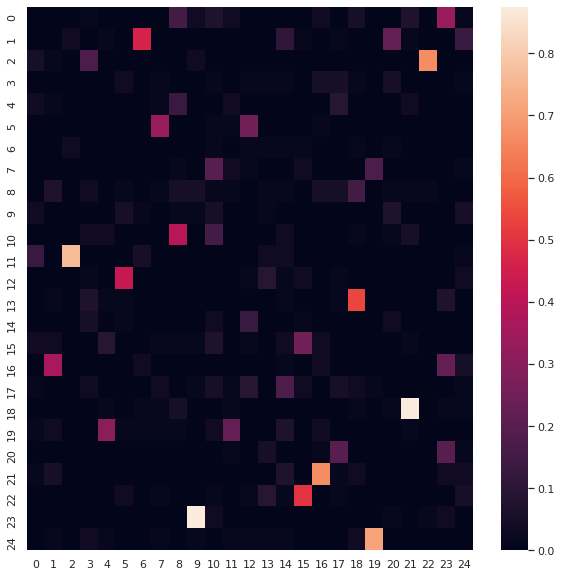

In [17]:
plt.figure()
sns.heatmap(jaccardMatrix)

In [ ]:
pick_similar_topic_from_past(jaccardMatrix)

# Function (2): Trace the evolution of a Specific Topic(idx) on Jaccard Matrixes 

In [27]:
# variables
tag_list = ["Week22", "Week23", "Week24", "Week25", "Week26"]
topic_num = 25

# fixed parameters
tag_dict = {v: k for k, v in enumerate(tag_list)} # e.g., {'Week24': 0, 'Week25': 1}
suffix = f"-Tweets-Rolling-{topic_num}topics-summary.csv"
model_path = "../models/"
figure_path = "../figures/"

# using zip to create moving window: (elem1, elem2), (elem2, elem3), ...
jaccard_trace = {}
for model1, model2 in zip(tag_list[:-1], tag_list[1:]):
    
    m1 = pd.read_csv(f"{model_path}{model1}{suffix}")
    m2 = pd.read_csv(f"{model_path}{model2}{suffix}")
    m1_ws = m1.relevant_words.to_dict()
    m2_ws = m2.relevant_words.to_dict()

    jaccardMatrix = calculate_jaccard_matrix_between_models(m1_ws, m2_ws)
    jaccard_trace[tag_dict[model2]] = jaccardMatrix # e.g., 1: jaccardMatrix of Week25

In [36]:
selected_week_name = "Week26"
max_idx = None
idx = 9
results = {}
for i in reversed(range(1, tag_dict[selected_week_name]+1)):
    jaccardMatrix = jaccard_trace[i]
    if max_idx == None:
        maxv = np.max(jaccardMatrix[:,idx])
        max_idx = np.argmax(jaccardMatrix[:,idx])
    else:
        maxv = np.max(jaccardMatrix[:,max_idx])
        max_idx = np.argmax(jaccardMatrix[:,max_idx])
    results[tag_list[i]] = (max_idx, maxv)

In [37]:
results

{'Week26': (9, 0.09090909090909091),
 'Week25': (9, 0.05263157894736842),
 'Week24': (9, 0.07142857142857142),
 'Week23': (9, 0.09090909090909091)}

# Function (3) Compare a Specific Topic(idx) in a Given Week to Other Weeks

In [74]:
# variables
selected_week_name = "Week25"
idx = 2
tag_list = [f"Week{i}" for i in range(10,27)]
topic_num = 25

# fixed variables
suffix = f"-Tweets-Rolling-{topic_num}topics-summary.csv"
model_path = "../models/"
figure_path = "../figures/"

tag_dict = {v: k for k, v in enumerate(tag_list)} # e.g., {'Week24': 0, 'Week25': 1}
week_idx = tag_dict[selected_week_name]
m2 = pd.read_csv(f"{model_path}{tag_list[week_idx]}{suffix}")
m2_ws = m2.relevant_words.to_dict()

result = {}
max_idx = None

for prev_model in tag_list[:week_idx]:
    print(prev_model, tag_list[week_idx])
    m1 = pd.read_csv(f"{model_path}{prev_model}{suffix}")
    m1_ws = m1.relevant_words.to_dict()

    jaccardMatrix = calculate_jaccard_matrix_between_models(m1_ws, m2_ws)
    
    maxv = np.max(jaccardMatrix[:,idx])
    max_idx = np.argmax(jaccardMatrix[:,idx])
    result[prev_model] = (max_idx, maxv)

Week10 Week25
Week11 Week25
Week12 Week25
Week13 Week25
Week14 Week25
Week15 Week25
Week16 Week25
Week17 Week25
Week18 Week25
Week19 Week25
Week20 Week25
Week21 Week25
Week22 Week25
Week23 Week25
Week24 Week25


{'Week10': (15, 0.15384615384615385), 'Week11': (15, 0.1320754716981132), 'Week12': (2, 0.15384615384615385), 'Week13': (2, 0.1111111111111111), 'Week14': (15, 0.15384615384615385), 'Week15': (2, 0.1320754716981132), 'Week16': (2, 0.1320754716981132), 'Week17': (2, 0.1111111111111111), 'Week18': (2, 0.09090909090909091), 'Week19': (2, 0.22448979591836735), 'Week20': (2, 0.09090909090909091), 'Week21': (2, 0.3333333333333333), 'Week22': (2, 0.22448979591836735), 'Week23': (2, 0.4634146341463415), 'Week24': (2, 0.6666666666666666)}


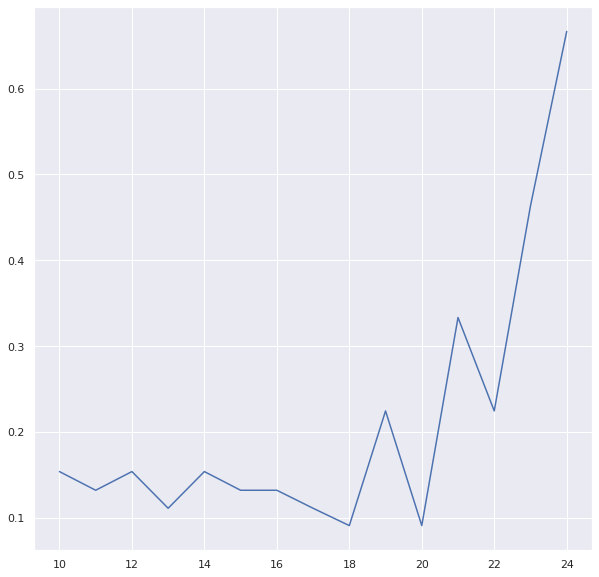

In [82]:
bar = {int(k[4:]):v[1] for k, v in result.items()}
print(result)

x, y = list(bar.keys()), list(bar.values())
plt.plot(x, y)